In [3]:
import datetime as dt
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from nsepy import get_history as gh

plt.style.use("fivethirtyeight")

## Defining Parameters

In [7]:
# list of stocks to fetch and analyze
stocks = ['TATAMOTORS','DABUR', 'ICICIBANK','WIPRO','BPCL','IRCTC','INFY','RELIANCE']

# date range for data fetching
start_date = dt.date(2020, 10, 14)
end_date = dt.date.today()

print(f"{len(stocks)} assets in the portfolio.")

8 assets in the portfolio.


## Fetching Data 

In [17]:
# create empty dataframe
data = pd.DataFrame()

for idx, stock in enumerate(stocks):
    # fetch stock symbol and close price
    stock_data = gh(symbol=stock, start=start_date, end=end_date)[['Symbol', 'Close']]
    # rename columns and drop symbols
    stock_data = (stock_data.rename(columns={"Close": stock_data['Symbol'][0]})
                            .drop(["Symbol"], axis=1))
    
    if idx == 0:
        data = stock_data
    elif idx != 0:
        data = data.join(stock_data)

data

,TATAMOTORS,DABUR,ICICIBANK,WIPRO,BPCL,IRCTC,INFY,RELIANCE
Date,,,,,,,,
2020-10-14,130.70,516.95,406.80,350.45,332.90,1338.05,1137.00,2287.50
2020-10-15,126.95,517.60,391.00,341.60,326.65,1329.50,1108.25,2206.50
2020-10-16,127.75,511.70,396.10,339.65,339.95,1328.10,1127.50,2175.80
2020-10-19,128.25,519.30,417.10,343.20,346.65,1326.90,1125.90,2176.20
2020-10-20,129.65,528.05,414.60,346.75,343.35,1332.20,1137.50,2155.90
...,...,...,...,...,...,...,...,...
2022-09-14,450.20,567.00,918.10,416.30,336.15,712.85,1475.40,2588.35
2022-09-15,447.25,563.45,917.60,415.05,331.40,724.35,1432.80,2562.70
2022-09-16,432.50,546.40,909.10,401.65,321.30,703.00,1377.05,2499.20


### Plotting Close Price history

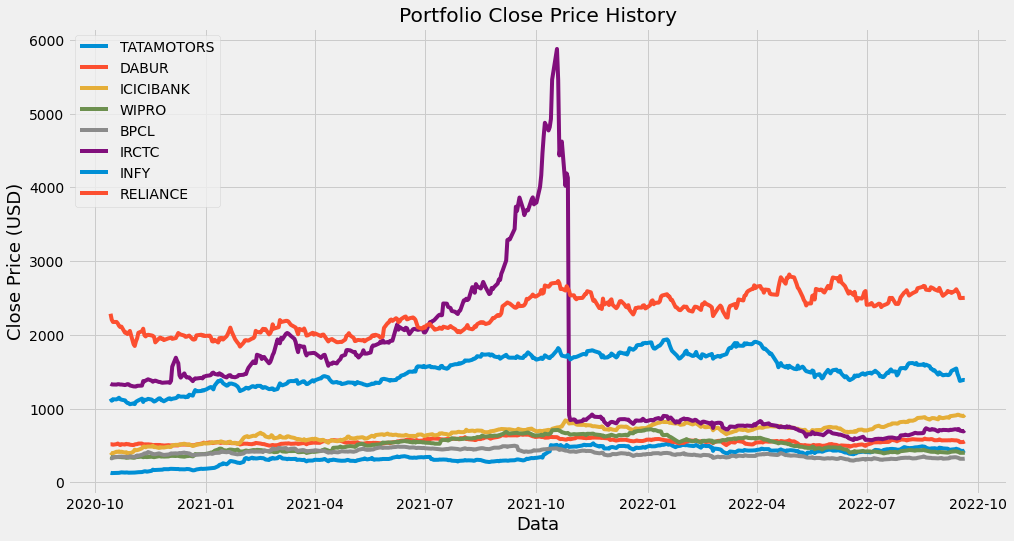

In [20]:
fig = plt.figure(figsize=(15,8))

for value in data.columns.values:
    plt.plot(data[value], label = value)

plt.title("Portfolio Close Price History")
plt.xlabel("Data", fontsize=18)
plt.ylabel("Close Price (USD)", fontsize=18)
plt.legend(data.columns.values, loc = "upper left")

plt.show(fig)

## Correlation Matrix

Determinig the coefficient of correlation between assets in the portfolio. This indicated the strength of releationship between the stocks in the portfolio, which essentially can be used for effective diversification.

In [21]:
corr_matrix = data.corr(method="pearson")
corr_matrix

,TATAMOTORS,DABUR,ICICIBANK,WIPRO,BPCL,IRCTC,INFY,RELIANCE
TATAMOTORS,1.000000,0.321306,0.895747,0.540838,-0.278535,-0.302015,0.766264,0.777496
DABUR,0.321306,1.000000,0.478357,0.706428,0.416635,0.487562,0.622137,0.290456
ICICIBANK,0.895747,0.478357,1.000000,0.496100,-0.232238,-0.187928,0.733322,0.782407
WIPRO,0.540838,0.706428,0.496100,1.000000,0.404755,0.342663,0.876070,0.393937
BPCL,-0.278535,0.416635,-0.232238,0.404755,1.000000,0.722546,0.048577,-0.426653
IRCTC,-0.302015,0.487562,-0.187928,0.342663,0.722546,1.000000,0.036857,-0.183103
INFY,0.766264,0.622137,0.733322,0.876070,0.048577,0.036857,1.000000,0.634067
RELIANCE,0.777496,0.290456,0.782407,0.393937,-0.426653,-0.183103,0.634067,1.000000


### Plotting Correlation Matrix

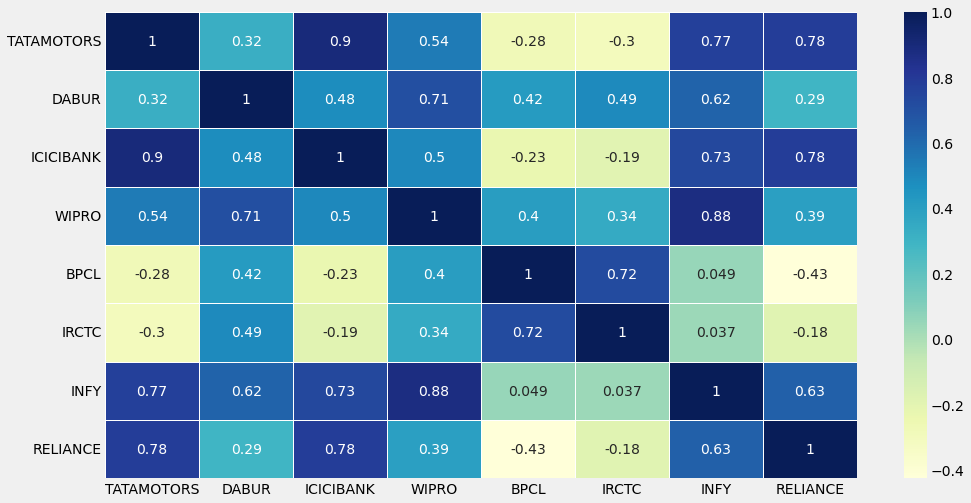

In [23]:
fig = plt.figure(figsize=(15,8))
sns.heatmap(corr_matrix, xticklabels=corr_matrix.columns, yticklabels=corr_matrix.columns,
            cmap="YlGnBu", annot=True, linewidth=0.5)
plt.show(fig)

- <b>WIPRO</b> and <b>InfoSys (INFY)</b> are heavily correlated, which is very logical because both commpanies belong to the same industry. 

- **BPCL** and **IRCTC** are negatively correlated. For the sake of diversification, it is necessary to have them in the portfolio. 
    - If <b>BPCL</b> goes down in one particulat direction, there's less chance of <b>IRCTC</b> moving in the same direction.

## Risk & Returns

### Daily Simple Returns

In [31]:
# daily simplr returns
returns_D1 = data.pct_change(1).dropna()
returns_D1

,TATAMOTORS,DABUR,ICICIBANK,WIPRO,BPCL,IRCTC,INFY,RELIANCE
Date,,,,,,,,
2020-10-15,-0.028692,0.001257,-0.038840,-0.025253,-0.018774,-0.006390,-0.025286,-0.035410
2020-10-16,0.006302,-0.011399,0.013043,-0.005708,0.040716,-0.001053,0.017370,-0.013913
2020-10-19,0.003914,0.014852,0.053017,0.010452,0.019709,-0.000904,-0.001419,0.000184
2020-10-20,0.010916,0.016850,-0.005994,0.010344,-0.009520,0.003994,0.010303,-0.009328
2020-10-21,0.004628,-0.023104,0.013748,-0.009517,0.018057,-0.000338,0.009538,-0.014518
...,...,...,...,...,...,...,...,...
2022-09-14,-0.014448,-0.007005,0.008901,-0.015024,-0.014367,-0.009862,-0.045018,-0.011986
2022-09-15,-0.006553,-0.006261,-0.000545,-0.003003,-0.014131,0.016132,-0.028874,-0.009910
2022-09-16,-0.032979,-0.030260,-0.009263,-0.032285,-0.030477,-0.029475,-0.038910,-0.024779


- Daily Simple Returns is essentially the percent change in the prices being calculated daily

### Plotting Daily Simple Returns

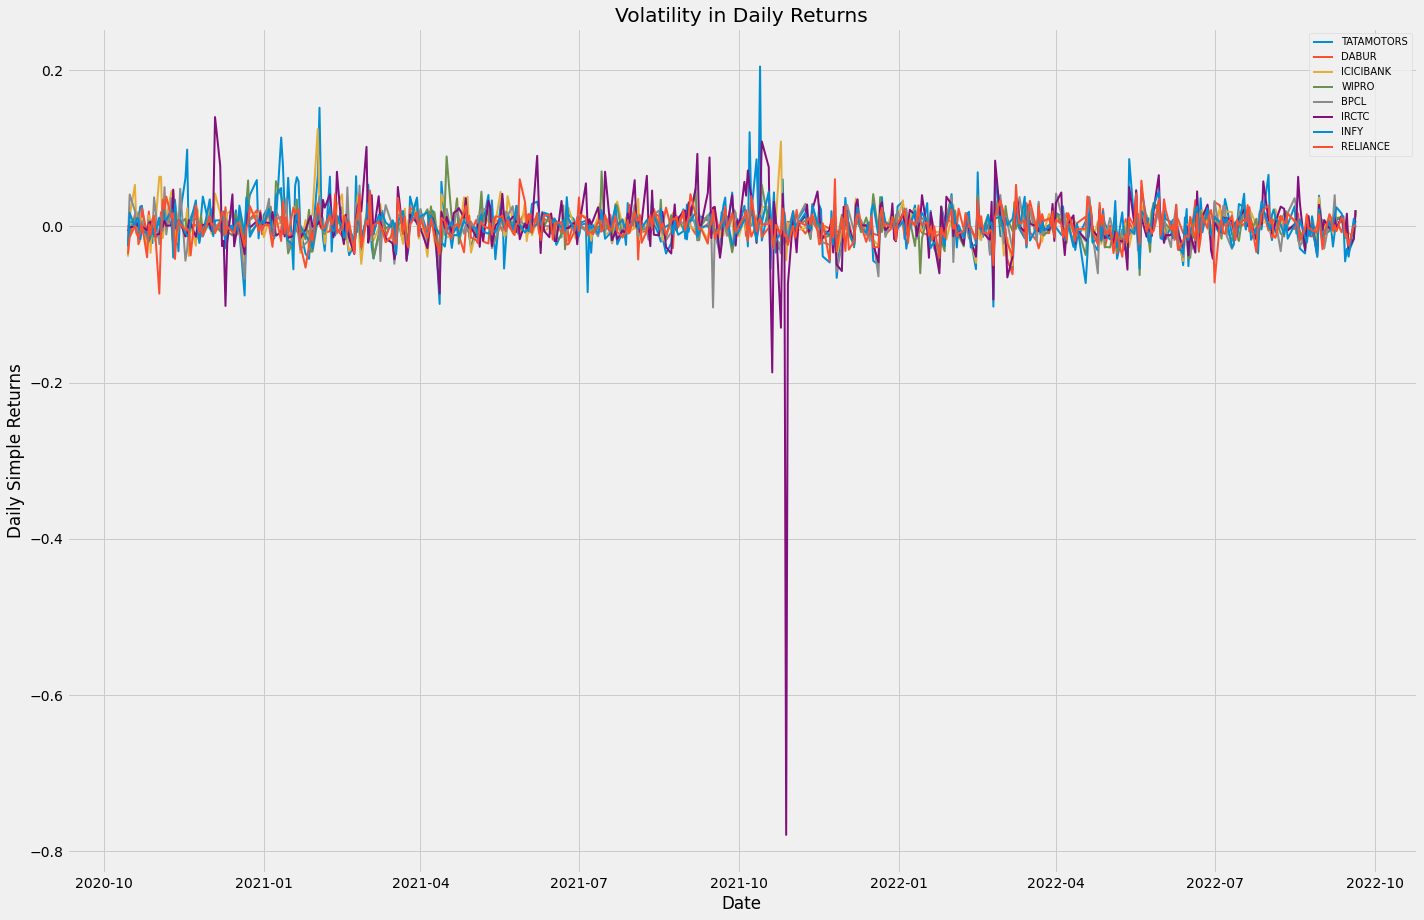

In [32]:
fig = plt.figure(figsize=(20,13))

for returns in returns_D1.columns.values:
    plt.plot(returns_D1[returns], lw=2, label = returns)

plt.title("Volatility in Daily Returns")
plt.xlabel("Date")
plt.ylabel("Daily Simple Returns")
plt.legend(loc = "upper right", fontsize = 10)
plt.tight_layout()

plt.savefig("reports/daily_simple_returns.png")
plt.show(fig)

- <b>IRCTC</b> is the most volatile stock than any of the individual stocks. 
- <b>ICICBANK</b> seems to be the least volatile stock, with swings much lower than any other stock.

### Average Daily Returns

In [33]:
avg_D1 = returns_D1.mean() * 100
avg_D1

TATAMOTORS    0.291099
DABUR         0.023943
ICICIBANK     0.186756
WIPRO         0.045777
BPCL          0.010423
IRCTC         0.058919
INFY          0.054109
RELIANCE      0.033977
dtype: float64

### Plotting Risk from Daily Returns

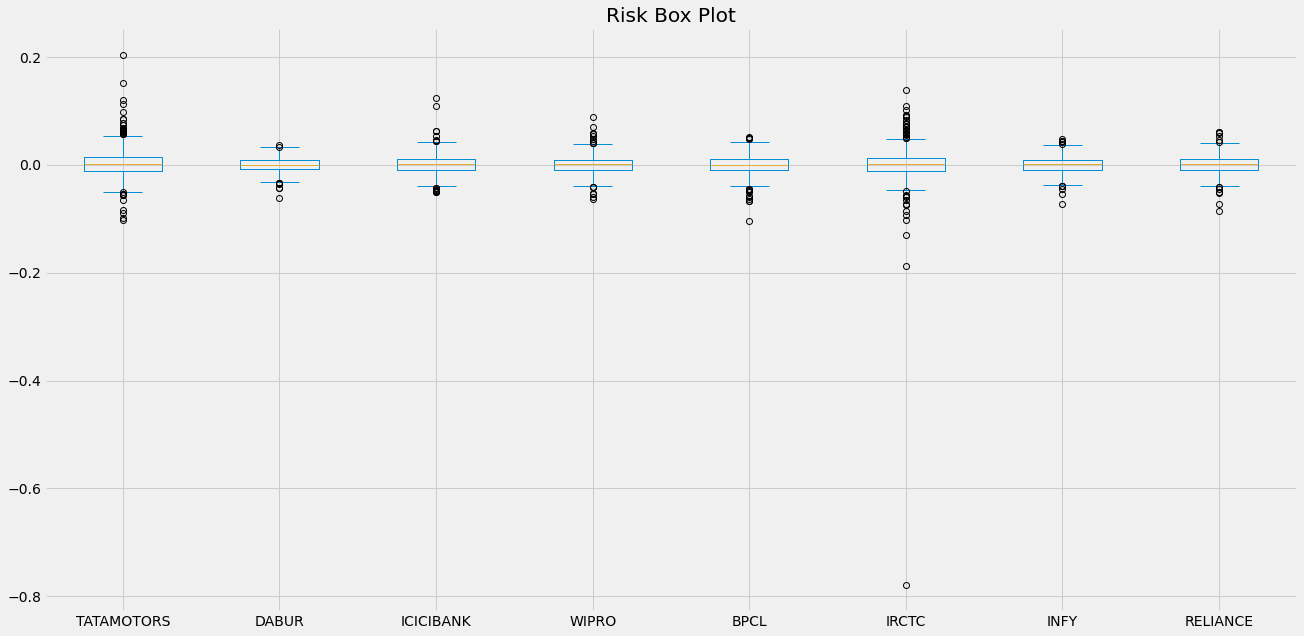

In [35]:
plot = returns_D1.plot(kind = "box", figsize = (20,10), title = "Risk Box Plot")
fig = plot.get_figure().savefig("reports/daily_risk.png")